In [1]:
import pandas as pd

df = pd.read_csv('../airline-passengers.csv', header=0, index_col=0, parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


<AxesSubplot:xlabel='Month'>

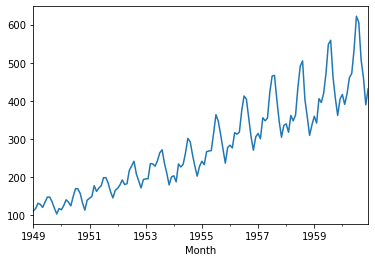

In [3]:
df['Passengers'].plot()

In [4]:
from statsmodels.tsa.stattools import adfuller

def ad_test(data):
    dftest = adfuller(df, autolag='AIC')
    print(f'1. ADF: {dftest[0]}')
    print(f'2. P-Value: {dftest[1]}')
    print(f'3. Num of Lags: {dftest[2]}')
    print(f'4. Num Of Observations Used For ADF Regression: {dftest[3]}')
    print(f'5. Critical Values: ')
    for key, val in dftest[4].items():
        print('\t',key , ':' , val)

In [5]:
ad_test(df['Passengers'])

1. ADF: 0.8153688792060423
2. P-Value: 0.9918802434376409
3. Num of Lags: 13
4. Num Of Observations Used For ADF Regression: 130
5. Critical Values: 
	 1% : -3.4816817173418295
	 5% : -2.8840418343195267
	 10% : -2.578770059171598


- p-value < 0.05 : is stationary
- p-value > 0.05 : not stationary

In [6]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Passengers'], trace=True, suppress_warnings=True, Seasonal=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.68 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.17 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.19 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [7]:
train, test = df[:120], df[120:]
print(train.shape, test.shape)

(120, 1) (24, 1)


In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train['Passengers'],order=(4,1,3))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  119
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -532.424
Method:                       css-mle   S.D. of innovations             20.309
Date:                Wed, 11 Aug 2021   AIC                           1082.848
Time:                        15:36:58   BIC                           1107.860
Sample:                    02-01-1949   HQIC                          1093.004
                         - 12-01-1958                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5099      0.127     19.747      0.000       2.261       2.759
ar.L1.D.Passengers     0.2564      0.073      3.521      0.000       0.114       0.399
ar.L2.D.Passengers    -0.4331      0.057     -7.631      0.000      -0.544      -0.322
ar.L3.D.Passengers     0.5763      0.056     10.226      0.000       0.466       0.687
ar.L4.D.Passengers    -0.6090      0.073     -8.392      0.000      -0.751      -0.467
ma.L1.D.Passengers    -0.1408      0.050     -2.805      0.005      -0.239      -0.042
ma.L2.D.Passengers     0.1407      0.048      2.920      0.003       0.046       0.235
ma.L3.D.Passengers    -0.9999      0.051    -19.623      0.000      -1.100      -0.900
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4942           -0.8871j            1.0155           -0.3309
AR.2           -0.4942           +0.8871j            1.0155            0.3309
AR.3            0.9674           -0.8103j            1.2619           -0.1110
AR.4            0.9674           +0.8103j            1.2619            0.1110
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.4296           -0.9030j            1.0000           -0.3207
MA.3           -0.4296           +0.9030j            1.0000            0.3207
-----------------------------------------------------------------------------
"""

In [31]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')

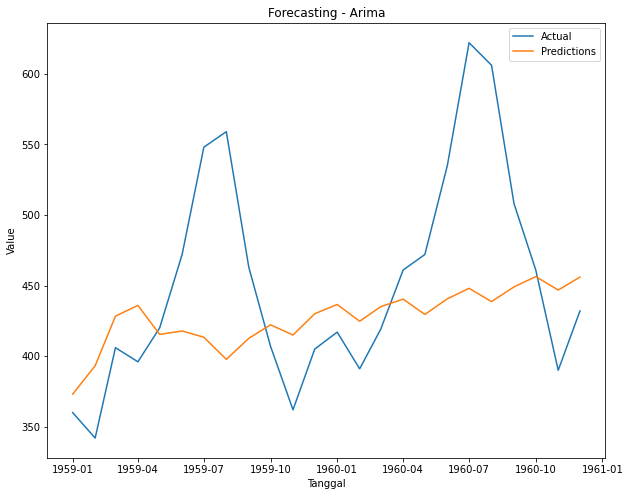

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, pred, label='Predictions')
plt.title('Forecasting - Arima')
plt.ylabel('Value')
plt.xlabel('Tanggal')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test, pred))
rmse

75.45968282448877

## Forecasting using fbprophet

In [20]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [24]:
df2 = df.copy()
df2 = df2.reset_index()
df2

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [25]:
df2.columns = ['ds','y']
df2

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


<AxesSubplot:xlabel='ds'>

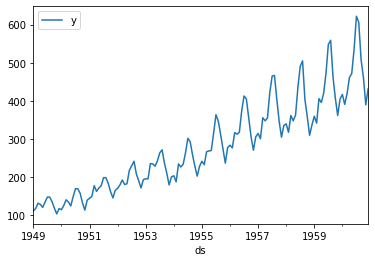

In [29]:
df2.plot(x='ds', y='y')

In [26]:
from fbprophet import Prophet

In [35]:
m = Prophet(interval_width=0.96, daily_seasonality=True, weekly_seasonality=True)
m_fit = m.fit(df2)
m_fit

In [36]:
future = m.make_future_dataframe(periods=100, freq='D')
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,110.866230,39.061791,131.612449,110.866230,110.866230,-24.207455,-24.207455,-24.207455,-3.983962,...,1.141335,1.141335,1.141335,-21.364828,-21.364828,-21.364828,0.0,0.0,0.0,86.658775
1,1949-02-01,113.023136,31.962425,121.741977,113.023136,113.023136,-37.385781,-37.385781,-37.385781,-3.983962,...,-3.829411,-3.829411,-3.829411,-29.572408,-29.572408,-29.572408,0.0,0.0,0.0,75.637355
2,1949-03-01,114.971309,62.172625,149.077391,114.971309,114.971309,-7.739733,-7.739733,-7.739733,-3.983962,...,-3.829411,-3.829411,-3.829411,0.073641,0.073641,0.073641,0.0,0.0,0.0,107.231577
3,1949-04-01,117.128216,68.009403,156.838756,117.128216,117.128216,-4.457539,-4.457539,-4.457539,-3.983962,...,4.766333,4.766333,4.766333,-5.239910,-5.239910,-5.239910,0.0,0.0,0.0,112.670677
4,1949-05-01,119.215544,66.847086,153.742839,119.215544,119.215544,-8.985005,-8.985005,-8.985005,-3.983962,...,-1.589642,-1.589642,-1.589642,-3.411402,-3.411402,-3.411402,0.0,0.0,0.0,110.230539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1961-03-07,498.311381,404.676927,493.914786,498.112306,498.513671,-48.924478,-48.924478,-48.924478,-3.983962,...,-3.829411,-3.829411,-3.829411,-41.111104,-41.111104,-41.111104,0.0,0.0,0.0,449.386904
240,1961-03-08,498.412250,403.083590,494.487286,498.210314,498.616947,-49.205529,-49.205529,-49.205529,-3.983962,...,1.104389,1.104389,1.104389,-46.325956,-46.325956,-46.325956,0.0,0.0,0.0,449.206720
241,1961-03-09,498.513118,396.950472,492.174383,498.307751,498.720223,-54.276759,-54.276759,-54.276759,-3.983962,...,0.598141,0.598141,0.598141,-50.890938,-50.890938,-50.890938,0.0,0.0,0.0,444.236359
242,1961-03-10,498.613986,399.419013,492.492277,498.403719,498.822930,-53.984502,-53.984502,-53.984502,-3.983962,...,4.766333,4.766333,4.766333,-54.766873,-54.766873,-54.766873,0.0,0.0,0.0,444.629484


In [38]:
df3 = forecast[['ds','yhat']]
df3

,ds,yhat
0,1949-01-01,86.658775
1,1949-02-01,75.637355
2,1949-03-01,107.231577
3,1949-04-01,112.670677
4,1949-05-01,110.230539
...,...,...
239,1961-03-07,449.386904
240,1961-03-08,449.206720
241,1961-03-09,444.236359
242,1961-03-10,444.629484


<AxesSubplot:xlabel='ds'>

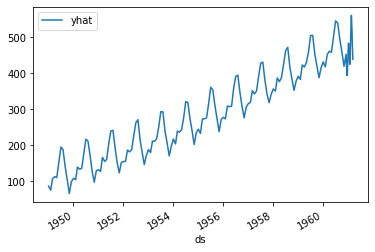

In [39]:
df3.plot(x='ds', y='yhat')

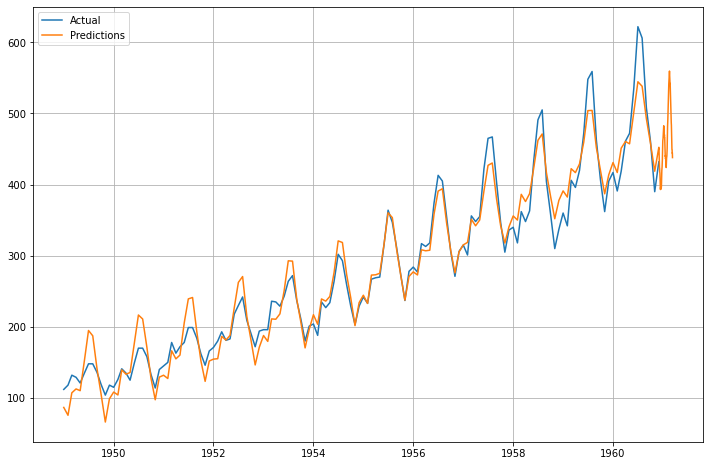

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(df2['ds'], df2['y'], label='Actual')
plt.plot(df3['ds'], df3['yhat'], label='Predictions')
plt.grid()
plt.legend()
plt.show()

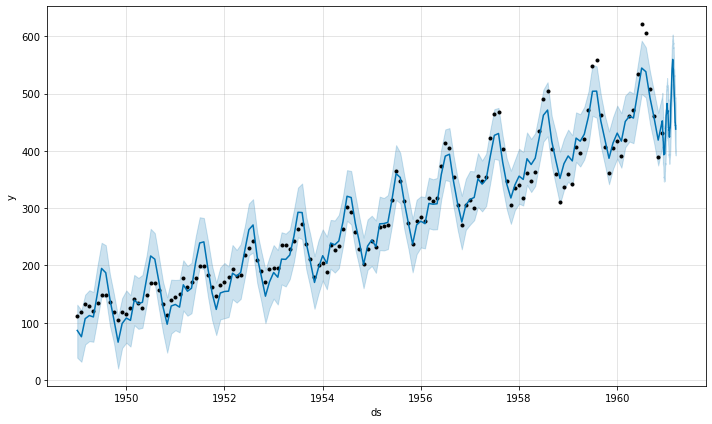

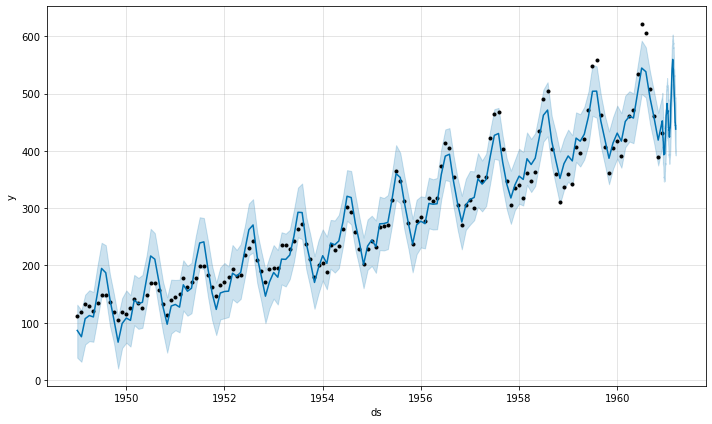

In [42]:
m.plot(forecast)

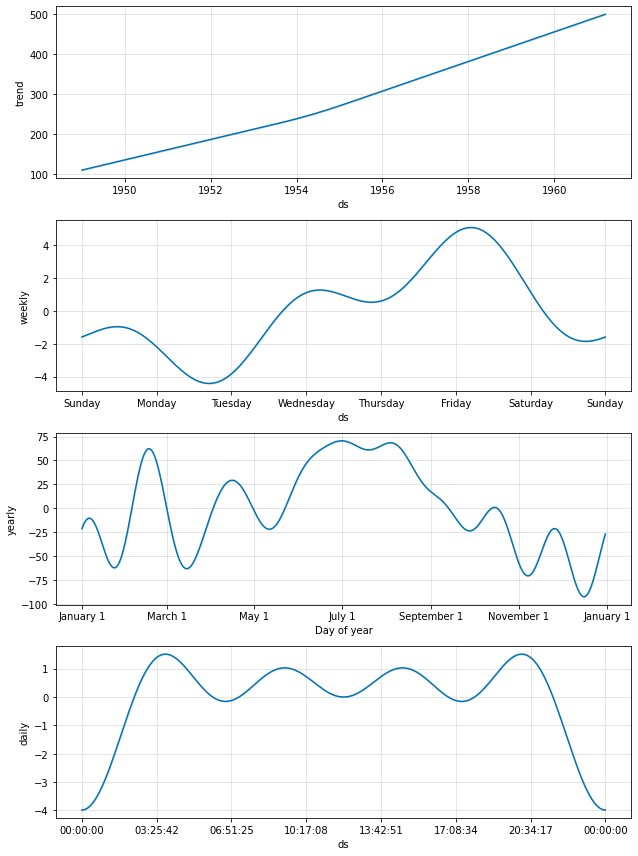

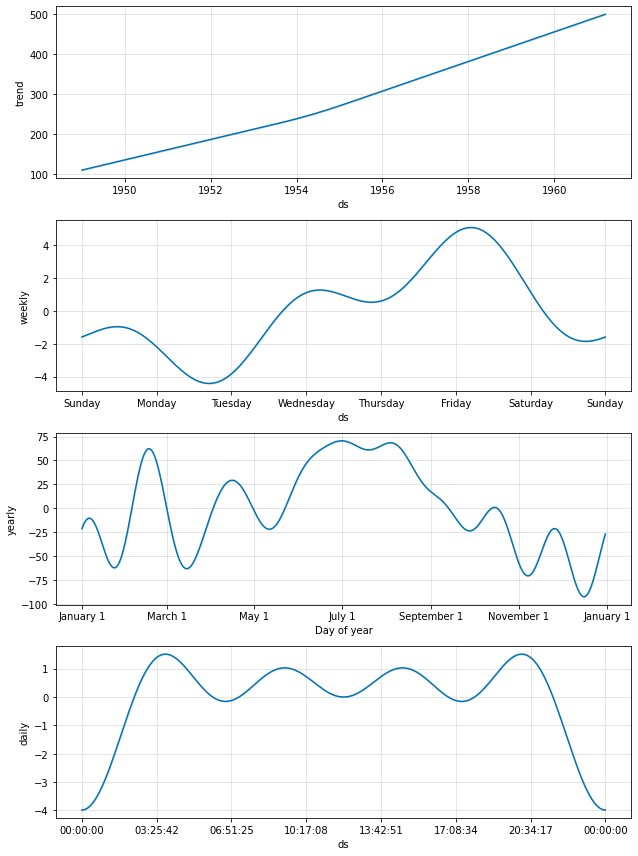

In [43]:
m.plot_components(forecast)